# Principal component analysis (PCA)

In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = load_breast_cancer()
X = raw_data.data
y = raw_data.target

df = pd.DataFrame(X, columns=raw_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA

X_train.shape: (381, 30)
pca_transformation.shape: (381, 30)


[Text(0.5, 1.0, 'Proportion variance explained'),
 Text(0, 0.5, 'PVE'),
 Text(0.5, 0, 'Number of PC')]

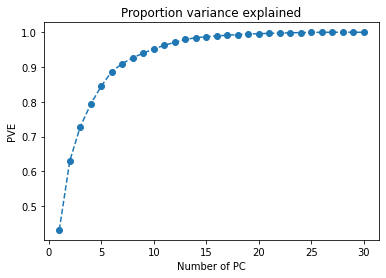

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("X_train.shape:",X_train.shape)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

pca = PCA(n_components= X.shape[1])
pca_transformation = pca.fit_transform(scaled_X_train)
print("pca_transformation.shape:", pca_transformation.shape)

proportion_variance_explainen = pca.explained_variance_ratio_
pve_cum_sum = np.cumsum(proportion_variance_explainen)
fig,ax = plt.figure(), plt.axes()
plt.plot(range(1,len(pve_cum_sum)+1), pve_cum_sum, "o--")
ax.set(title = "Proportion variance explained", ylabel = "PVE", xlabel = "Number of PC")